In [1]:
# Import necessary libs
from splinter import Browser
from bs4 import BeautifulSoup as soup
import re
import pandas as pd
import matplotlib.pyplot as plt
import time

In [21]:
# Set up Splinter
browser = Browser('chrome')

# Set up base url
base_url = 'https://www.facebook.com/marketplace/toronto/search?'

# Set up search params
min_price = 1000
max_price = 30000
days_listed = 7
min_mileage = 50000
max_mileage = 200000
min_year = 2000
max_year = 2020
transmission = "automatic"
make = "Honda"
model = "Civic"

# Set up full url
url = f"{base_url}minPrice={min_price}&maxPrice={max_price}&daysSinceListed={days_listed}&maxMileage={max_mileage}&maxYear={max_year}&minMileage={min_mileage}&minYear={min_year}&transmissionType={transmission}&query={make}{model}&exact=false"


In [22]:
# visit the website
browser.visit(url)

In [4]:
# Dealing with Login Dialog
if browser.is_element_present_by_css('div[aria-label="Close"]', wait_time=10):
    # Click on the element once it's found
    browser.find_by_css('div[aria-label="Close"]').first.click()

In [5]:
# Scroll down to load more results

scroll_count = 4

scroll_delay = 2

for _ in range(scroll_count):
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(scroll_delay)

In [6]:
# Parse HTML
html = browser.html

# Create a BS object from scraped HTML
market_soup = soup(html, 'html.parser')

# Check the result
market_soup


<html class="_9dls __fb-light-mode" dir="ltr" id="facebook" lang="en"><head><link data-badged-icon="https://static.xx.fbcdn.net/rsrc.php/yD/r/UJj0tgk-RrT.ico" data-default-icon="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" href="https://static.xx.fbcdn.net/rsrc.php/yT/r/aGT3gskzWBf.ico" rel="shortcut icon"/><meta content="noarchive" name="bingbot"/><meta content="width=device-width,initial-scale=1,maximum-scale=2,shrink-to-fit=no" name="viewport"/><link crossorigin="use-credentials" href="/data/manifest/" id="MANIFEST_LINK" rel="manifest"/><meta content="light" name="color-scheme"/><meta content="#FFFFFF" name="theme-color"/><style nonce="">:root, .__fb-light-mode:root, .__fb-light-mode {--fds-black:#000000;--fds-black-alpha-05:rgba(0, 0, 0, 0.05);--fds-black-alpha-10:rgba(0, 0, 0, 0.1);--fds-black-alpha-15:rgba(0, 0, 0, 0.15);--fds-black-alpha-20:rgba(0, 0, 0, 0.2);--fds-black-alpha-30:rgba(0, 0, 0, 0.3);--fds-black-alpha-40:rgba(0, 0, 0, 0.4);--fds-black-alpha-50:rgba(0

In [7]:
# End the automated browsing session
browser.quit()

In [24]:
# Extract all necessary info 
titles_div = market_soup.find_all('span', class_="x1lliihq x6ikm8r x10wlt62 x1n2onr6")
titles_list = [title.text.strip() for title in titles_div]
prices_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x676frb x1lkfr7t x1lbecb7 x1s688f xzsf02u")
prices_list = [price.text.strip() for price in prices_div]
kilometrage_div = market_soup.find_all('span', class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x4zkp8e x3x7a5m x1nxh6w3 x1sibtaa xo1l8bm xi81zsa")
kilometrage_list = [mileage.text.strip() for mileage in kilometrage_div]
urls_div = market_soup.find_all('a', class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g x1sur9pj xkrqix3 x1lku1pv")
urls_list = [url.get('href') for url in urls_div]

In [26]:
urls_list

['/marketplace/item/1225423208849422/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/864726025579109/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/859351212913654/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/509367158438827/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/895380115950617/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/1043204740002753/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/977003030774199/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/2747115708781608/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/1533847960848942/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD',
 '/marketplace/item/2328111040870

In [11]:
prices_list

['CA$16,950',
 'CA$3,900',
 'CA$11,950',
 'CA$9,999',
 'CA$13,595',
 'CA$9,800',
 'CA$16,988',
 'CA$8,450',
 'CA$11,950',
 'CA$14,995',
 'CA$13,000',
 'CA$15,995',
 'CA$14,500',
 'CA$18,950',
 'CA$15,995',
 'CA$18,499',
 'CA$18,000',
 'CA$6,100',
 'CA$16,995',
 'CA$22,000',
 'CA$18,995',
 'CA$7,900',
 'CA$5,500',
 'CA$11,450',
 'CA$3,500',
 'CA$17,595',
 'CA$13,450',
 'CA$11,950',
 'CA$12,300',
 'CA$11,490',
 'CA$14,999',
 'CA$10,995',
 'CA$11,477',
 'CA$12,999',
 'CA$10,700',
 'CA$19,000',
 'CA$15,950',
 'CA$5,999',
 'CA$15,995',
 'CA$8,499',
 'CA$16,777',
 'CA$19,990',
 'CA$15,950',
 'CA$24,000',
 'CA$4,500',
 'CA$9,999',
 'CA$7,500',
 'CA$6,200',
 'CA$9,495',
 'CA$18,499',
 'CA$6,349',
 'CA$14,965',
 'CA$17,500',
 'CA$16,495',
 'CA$21,499',
 'CA$14,495',
 'CA$8,500',
 'CA$11,999',
 'CA$13,888',
 'CA$15,995',
 'CA$16,888',
 'CA$18,500',
 'CA$13,490',
 'CA$20,980',
 'CA$22,495',
 'CA$18,900',
 'CA$13,495',
 'CA$19,999',
 'CA$13,295',
 'CA$14,995',
 'CA$18,499',
 'CA$18,999',
 'CA$22,5

In [12]:
kilometrage_list

['Toronto, ON',
 '93K km',
 'Toronto, ON',
 '198K km',
 'Toronto, ON',
 '85K km',
 'Toronto, ON',
 '107K km',
 'Toronto, ON',
 '143K km',
 'Mississauga, ON',
 '132K km',
 'Toronto, ON',
 '125K km',
 'Toronto, ON',
 '184K km',
 'Toronto, ON',
 '116K km',
 'Toronto, ON',
 '163K km',
 'Toronto, ON',
 '170K km',
 'Toronto, ON',
 '120K km',
 'Oakville, ON',
 '163K km',
 'Toronto, ON',
 '72K km',
 'Toronto, ON',
 '125K km',
 'Toronto, ON',
 '89K km',
 'Toronto, ON',
 '97K km',
 'Markham, ON',
 '197K km',
 'Toronto, ON',
 '129K km',
 'Toronto, ON',
 '76K km',
 'Toronto, ON',
 '141K km',
 'Markham, ON',
 '197K km',
 'Hamilton, ON',
 '178K km',
 'Toronto, ON',
 '136K km',
 'Hamilton, ON',
 '175K km',
 'Toronto, ON',
 '140K km',
 'Toronto, ON',
 '194K km',
 'Toronto, ON',
 '170K km',
 'Mississauga, ON',
 '154K km',
 'Toronto, ON',
 '178K km',
 'Mississauga, ON',
 '127K km',
 'Toronto, ON',
 '136K km',
 'Toronto, ON',
 '142K km',
 'Mississauga, ON',
 '98K km',
 'Mississauga, ON',
 '143K km',
 'Ha

In [13]:
# Create a regex to match city,state 
pattern = re.compile(r'(\w+(?:-\w+)?, [A-Z]{2})')

# Intialize an empty list to store adjusted Kilometrage
kilometrage_list2 = []

# Iterarte trough the original Kilometrage to remove N/A (Kilometrage Not Available)
for item in kilometrage_list:
    kilometrage_list2.append(item)

    if pattern.match(item) and len(kilometrage_list2) >= 2 and pattern.match(kilometrage_list2[-2]):
        kilometrage_list2.insert(-1, '0K km')
        

In [14]:
kilometrage_list2

['Toronto, ON',
 '93K km',
 'Toronto, ON',
 '198K km',
 'Toronto, ON',
 '85K km',
 'Toronto, ON',
 '107K km',
 'Toronto, ON',
 '143K km',
 'Mississauga, ON',
 '132K km',
 'Toronto, ON',
 '125K km',
 'Toronto, ON',
 '184K km',
 'Toronto, ON',
 '116K km',
 'Toronto, ON',
 '163K km',
 'Toronto, ON',
 '170K km',
 'Toronto, ON',
 '120K km',
 'Oakville, ON',
 '163K km',
 'Toronto, ON',
 '72K km',
 'Toronto, ON',
 '125K km',
 'Toronto, ON',
 '89K km',
 'Toronto, ON',
 '97K km',
 'Markham, ON',
 '197K km',
 'Toronto, ON',
 '129K km',
 'Toronto, ON',
 '76K km',
 'Toronto, ON',
 '141K km',
 'Markham, ON',
 '197K km',
 'Hamilton, ON',
 '178K km',
 'Toronto, ON',
 '136K km',
 'Hamilton, ON',
 '175K km',
 'Toronto, ON',
 '140K km',
 'Toronto, ON',
 '194K km',
 'Toronto, ON',
 '170K km',
 'Mississauga, ON',
 '154K km',
 'Toronto, ON',
 '178K km',
 'Mississauga, ON',
 '127K km',
 'Toronto, ON',
 '136K km',
 'Toronto, ON',
 '142K km',
 'Mississauga, ON',
 '98K km',
 'Mississauga, ON',
 '143K km',
 'Ha

In [15]:
# Extracted mileage list (separate from location and extract numeric values only)
# Define regular expressions to extract numeric mileage values in "K km" and "K miles" format
mileage_pattern_km = r'(\d+)K km'
mileage_pattern_miles = r'(\d+)K miles'

kilometrage_clean = []

for item in kilometrage_list2:
    
    match_mileage_km = re.search(mileage_pattern_km, item)
    
    match_mileage_miles = re.search(mileage_pattern_miles, item)

    if match_mileage_miles or match_mileage_km:
        
        if match_mileage_km:
            kilometrage_clean.append(int(match_mileage_km.group(1)) * 1000)
        else :
            kilometrage_clean.append(int(match_mileage_miles.group(1)) * 1600)

        
            


In [16]:
kilometrage_clean

[93000,
 198000,
 85000,
 107000,
 143000,
 132000,
 125000,
 184000,
 116000,
 163000,
 170000,
 120000,
 163000,
 72000,
 125000,
 89000,
 97000,
 197000,
 129000,
 76000,
 141000,
 197000,
 178000,
 136000,
 175000,
 140000,
 194000,
 170000,
 154000,
 178000,
 127000,
 136000,
 142000,
 98000,
 143000,
 64000,
 142000,
 187000,
 183000,
 149000,
 53000,
 74000,
 126000,
 53000,
 233600,
 172000,
 134000,
 110000,
 167000,
 83000,
 130000,
 149000,
 151000,
 105000,
 105000,
 152000,
 178000,
 161000,
 147000,
 119000,
 125000,
 52000,
 149000,
 114000,
 107000,
 92000,
 70000,
 72000,
 144000,
 109000,
 142000,
 144000,
 55000,
 196800,
 96000,
 147000,
 128000,
 59000,
 119000,
 109000,
 119000,
 70000,
 118400,
 101000,
 83000,
 145000,
 59000,
 177000,
 112000,
 127000,
 54000,
 98000]

In [36]:
# Add all values to a list of dicts
vehicles_list = []

for i, item in enumerate(titles_list):
    cars_dict = {}

    # Split year and make and model into different fields
    titles_split = titles_list[i].split()

    cars_dict['Year'] = int(titles_split[0])
    cars_dict['Make'] = titles_split[1]
    cars_dict['Model'] = titles_split[2]
    cars_dict['Price'] = int(re.sub(r'[^\d.]', '', prices_list[i]))
    cars_dict['Kilometrage'] = kilometrage_clean[i]
    cars_dict['URL'] = urls_list[i]
    vehicles_list.append(cars_dict)

In [37]:
vehicles_list

[{'Year': 2017,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 16950,
  'Kilometrage': 93000,
  'URL': '/marketplace/item/1225423208849422/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2007,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 3900,
  'Kilometrage': 198000,
  'URL': '/marketplace/item/864726025579109/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2014,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 11950,
  'Kilometrage': 85000,
  'URL': '/marketplace/item/859351212913654/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2012,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 9999,
  'Kilometrage': 107000,
  'URL': '/marketplace/item/509367158438827/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'},
 {'Year': 2016,
  'Make': 'Honda',
  'Model': 'civic',
  'Price': 13595,
  'Kilometrage': 143000,
  'URL': '/marketplace/item/895380115950617/?ref=

In [38]:
len(vehicles_list)

92

In [39]:
# Using Pandas to create a DataFrame
vehicles_df = pd.DataFrame(vehicles_list)

In [40]:
vehicles_df

,Year,Make,Model,Price,Kilometrage,URL
0,2017,Honda,civic,16950,93000,/marketplace/item/1225423208849422/?ref=search...
1,2007,Honda,civic,3900,198000,/marketplace/item/864726025579109/?ref=search&...
2,2014,Honda,civic,11950,85000,/marketplace/item/859351212913654/?ref=search&...
3,2012,Honda,civic,9999,107000,/marketplace/item/509367158438827/?ref=search&...
4,2016,Honda,civic,13595,143000,/marketplace/item/895380115950617/?ref=search&...
...,...,...,...,...,...,...
87,2015,Honda,civic,14888,177000,/marketplace/item/2117096262009024/?ref=search...
88,2018,Honda,civic,17988,112000,/marketplace/item/860002198903746/?ref=search&...
89,2020,Honda,civic,23399,127000,/marketplace/item/823397629897153/?ref=search&...
90,2018,Honda,civic,20990,54000,/marketplace/item/461098773554057/?ref=search&...


In [41]:
# changing the partial URL to Absolute URL
vehicles_df['URL'] = 'https://www.facebook.com' + vehicles_df['URL']

In [42]:
vehicles_df

,Year,Make,Model,Price,Kilometrage,URL
0,2017,Honda,civic,16950,93000,https://www.facebook.com/marketplace/item/1225...
1,2007,Honda,civic,3900,198000,https://www.facebook.com/marketplace/item/8647...
2,2014,Honda,civic,11950,85000,https://www.facebook.com/marketplace/item/8593...
3,2012,Honda,civic,9999,107000,https://www.facebook.com/marketplace/item/5093...
4,2016,Honda,civic,13595,143000,https://www.facebook.com/marketplace/item/8953...
...,...,...,...,...,...,...
87,2015,Honda,civic,14888,177000,https://www.facebook.com/marketplace/item/2117...
88,2018,Honda,civic,17988,112000,https://www.facebook.com/marketplace/item/8600...
89,2020,Honda,civic,23399,127000,https://www.facebook.com/marketplace/item/8233...
90,2018,Honda,civic,20990,54000,https://www.facebook.com/marketplace/item/4610...


In [43]:
# Cleaning data based on Model param defined earlier
filtered_df = vehicles_df[vehicles_df["Model"].str.lower() == model.lower()]


In [44]:
filtered_df

,Year,Make,Model,Price,Kilometrage,URL
0,2017,Honda,civic,16950,93000,https://www.facebook.com/marketplace/item/1225...
1,2007,Honda,civic,3900,198000,https://www.facebook.com/marketplace/item/8647...
2,2014,Honda,civic,11950,85000,https://www.facebook.com/marketplace/item/8593...
3,2012,Honda,civic,9999,107000,https://www.facebook.com/marketplace/item/5093...
4,2016,Honda,civic,13595,143000,https://www.facebook.com/marketplace/item/8953...
...,...,...,...,...,...,...
87,2015,Honda,civic,14888,177000,https://www.facebook.com/marketplace/item/2117...
88,2018,Honda,civic,17988,112000,https://www.facebook.com/marketplace/item/8600...
89,2020,Honda,civic,23399,127000,https://www.facebook.com/marketplace/item/8233...
90,2018,Honda,civic,20990,54000,https://www.facebook.com/marketplace/item/4610...


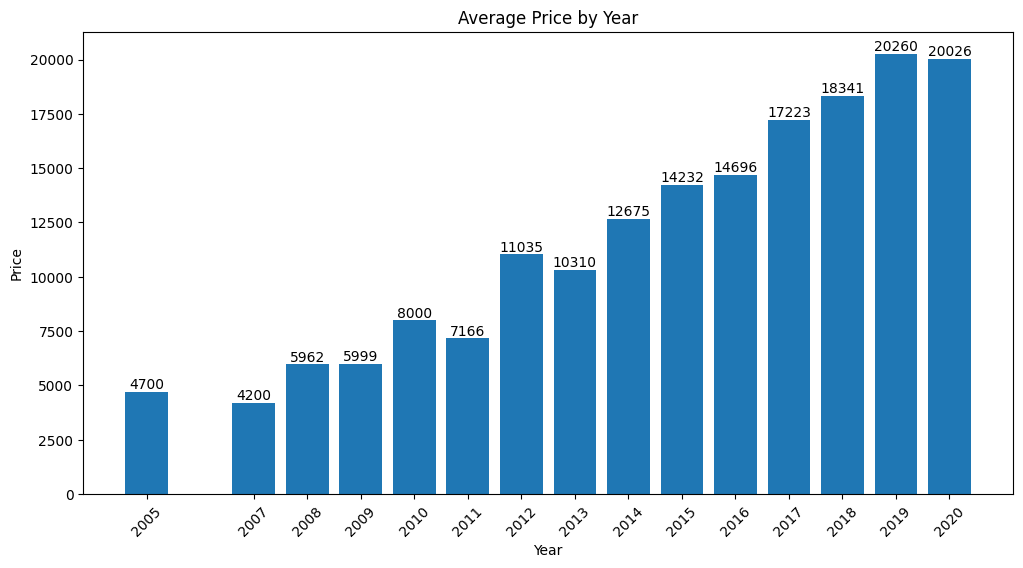

In [55]:
# grouping vehicles by year and plotting the mean for each year
yearly_prices = vehicles_df.groupby("Year")['Price'].mean()

plt.figure(figsize=(12, 6))

# Create the column chart
plt.bar(yearly_prices.index, yearly_prices.values)

# Add values on top of the bars with no digits after the period
for x, y in zip(yearly_prices.index, yearly_prices.values):
    y = int(y)  # Convert to an integer to remove digits after the period
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average Price by Year')

# Use adaptive scale for the year axis
plt.xticks(yearly_prices.index, rotation=45)

plt.show()

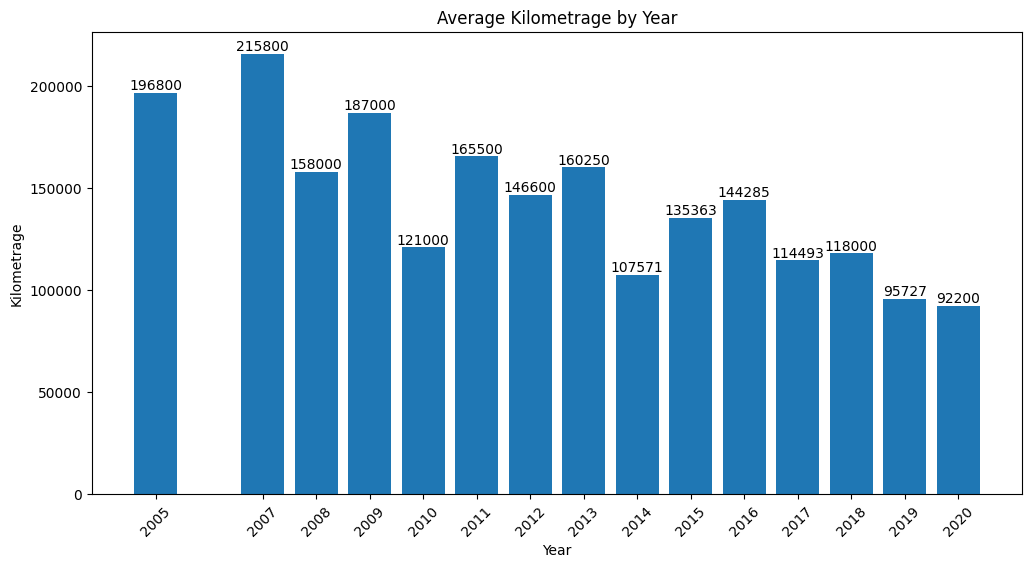

In [57]:
filtered_df = filtered_df[filtered_df['Kilometrage'] != 0]

# grouping vehicles by year and plotting the mean for each year
yearly_prices = filtered_df.groupby("Year")['Kilometrage'].mean()

plt.figure(figsize=(12, 6))

# Create the column chart
plt.bar(yearly_prices.index, yearly_prices.values)

# Add values on top of the bars with no digits after the period
for x, y in zip(yearly_prices.index, yearly_prices.values):
    y = int(y)  # Convert to an integer to remove digits after the period
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Kilometrage')
plt.title('Average Kilometrage by Year')

# Use adaptive scale for the year axis
plt.xticks(yearly_prices.index, rotation=45)

plt.show()

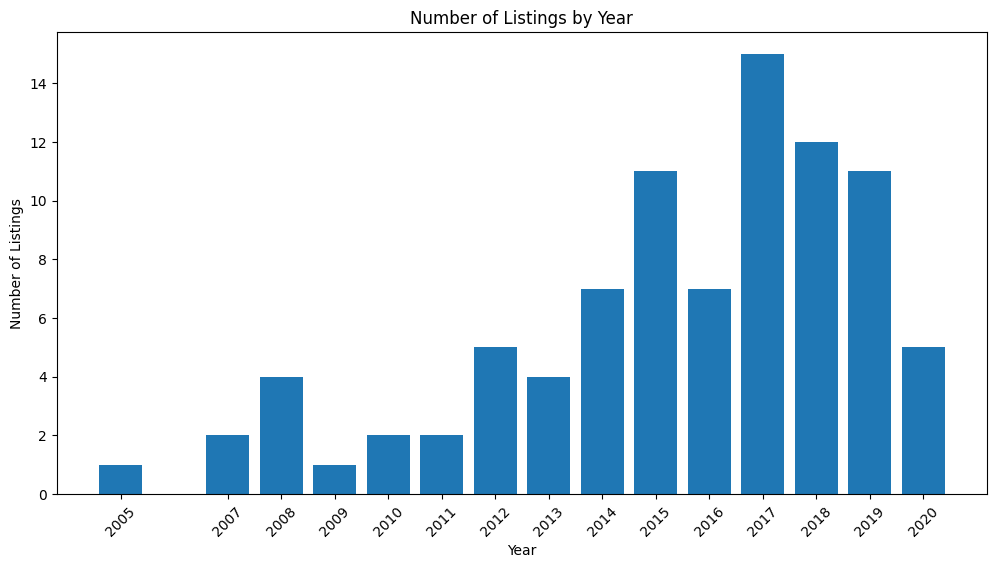

In [59]:
filtered_df = filtered_df[filtered_df['Kilometrage'] != 0]

# grouping vehicles by year and plotting 
yearly_count = filtered_df.groupby("Year").size()

plt.figure(figsize=(12, 6))

# Create the column chart
plt.bar(yearly_count.index, yearly_count.values)

plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Year')

# Use adaptive scale for the year axis
plt.xticks(yearly_count.index, rotation=45)

plt.show()

In [62]:
cheapest_civi_url = filtered_df[filtered_df['Price'] == filtered_df['Price'].min()]['URL'].values[0]

In [63]:
cheapest_civi_url

'https://www.facebook.com/marketplace/item/1199105994733182/?ref=search&referral_code=null&referral_story_type=post&__tn__=!%3AD'

In [64]:
# Export to csv file
filtered_df.to_csv('car-listing-fb-marketplace.csv')